## importing necessary library

In [241]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.metrics import accuracy_score as a_s
sns.set()

## importing datasets

In [242]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Data Preprocessing

In [243]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [244]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [245]:
train.drop(columns='Cabin',axis = 1,inplace = True)
test.drop(columns='Cabin',axis = 1,inplace = True)

In [246]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [247]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [248]:
train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [249]:
train.Embarked.fillna(train.Embarked.mode()[0],inplace = True)

In [250]:
test.Fare.fillna(test.Fare.mean(),inplace =True)

In [251]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [252]:
age_train = np.random.randint(train.Age.mean()-train.Age.std(),train.Age.mean()+train.Age.std(),177)

In [253]:
age_test = np.random.randint(test.Age.mean()-test.Age.std(),test.Age.mean()+test.Age.std(),86)

In [254]:
train.Age[train.Age.isnull()] = age_train

C:\Users\HP\AppData\Local\Temp\ipykernel_3808\3436648081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Age[train.Age.isnull()] = age_train


In [255]:
test.Age[test.Age.isnull()] = age_test

C:\Users\HP\AppData\Local\Temp\ipykernel_3808\2800863036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Age[test.Age.isnull()] = age_test


In [256]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [257]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


## EDA

In [258]:
train.groupby(['Pclass'])["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [259]:
train.groupby(['Sex'])["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [260]:
train.groupby(['Embarked'])["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_3808\2534536325.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.Age)


<Axes: xlabel='Age', ylabel='Density'>

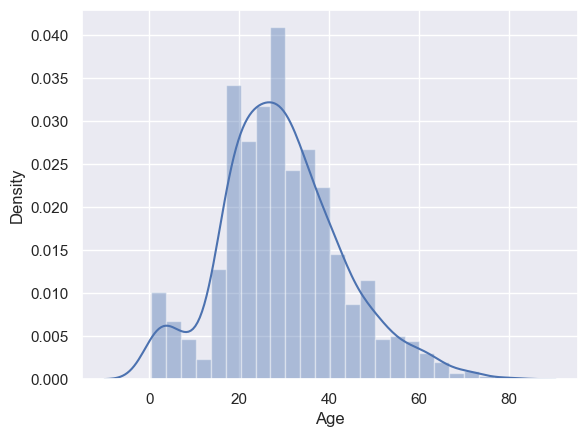

In [261]:
sns.distplot(train.Age)

C:\Users\HP\AppData\Local\Temp\ipykernel_3808\109381100.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.Age[train.Survived == 0])
C:\Users\HP\AppData\Local\Temp\ipykernel_3808\109381100.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.Age[train.Survived == 1])


<Axes: xlabel='Age', ylabel='Density'>

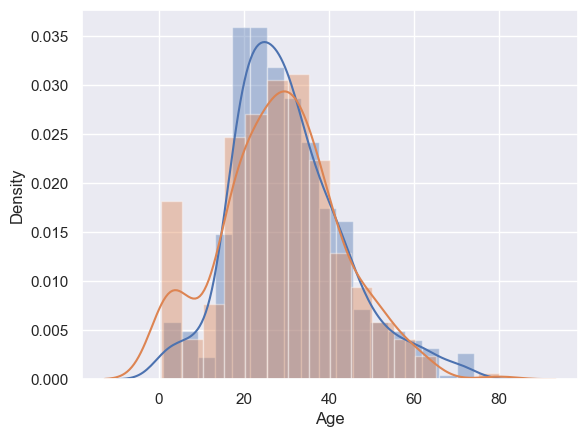

In [262]:
sns.distplot(train.Age[train.Survived == 0])
sns.distplot(train.Age[train.Survived == 1])

C:\Users\HP\AppData\Local\Temp\ipykernel_3808\1919020997.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.Fare[train.Survived == 0])
C:\Users\HP\AppData\Local\Temp\ipykernel_3808\1919020997.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.Fare[train.Survived == 1])


<Axes: xlabel='Fare', ylabel='Density'>

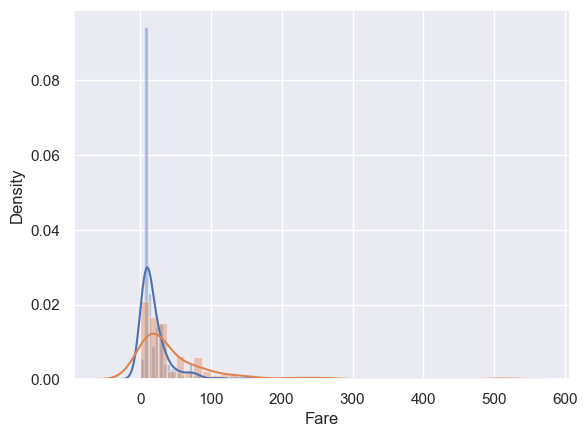

In [263]:
sns.distplot(train.Fare[train.Survived == 0])
sns.distplot(train.Fare[train.Survived == 1])

In [264]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [265]:
train.drop(columns = ['Ticket'],inplace = True)
test.drop(columns = ['Ticket'],inplace = True)

In [266]:
train['family'] = train.SibSp + train.Parch + 1

In [267]:
test['family'] = test.SibSp + test.Parch + 1

In [268]:
train.family.value_counts()

family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [269]:
train.groupby(['family'])["Survived"].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [270]:
def family_Size(number):
    if number == 1:
        return "Alone"
    elif number>1 and number<5:
        return "Medium"
    else:
        return "Large"

In [271]:
train['family_size'] = train['family'].apply(family_Size)

In [272]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,23.4500,S,4,Medium
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,Alone


In [273]:
test['family_size'] = test['family'].apply(family_Size)

In [274]:
train.drop(columns = ['SibSp',"Parch","family","Fare"],inplace = True)
test.drop(columns = ['SibSp',"Parch","family","Fare"],inplace = True)

In [275]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,S,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,S,Alone
...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,S,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,S,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,S,Medium
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,C,Alone


In [276]:
passengerID = test.PassengerId.values

In [277]:
train.drop(columns = ['Name','PassengerId'],inplace = True)
test.drop(columns = ['Name','PassengerId'],inplace = True)

In [278]:
train

,Survived,Pclass,Sex,Age,Embarked,family_size
0,0,3,male,22.0,S,Medium
1,1,1,female,38.0,C,Medium
2,1,3,female,26.0,S,Alone
3,1,1,female,35.0,S,Medium
4,0,3,male,35.0,S,Alone
...,...,...,...,...,...,...
886,0,2,male,27.0,S,Alone
887,1,1,female,19.0,S,Alone
888,0,3,female,29.0,S,Medium
889,1,1,male,26.0,C,Alone


In [279]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Embarked       0
family_size    0
dtype: int64

In [280]:
train = pd.get_dummies(train,columns = ['Pclass','Sex','family_size','Embarked'],drop_first = True,dtype= int)

In [281]:
test = pd.get_dummies(test,columns = ['Pclass','Sex','family_size','Embarked'],drop_first = True,dtype= int)

In [295]:
train.drop(columns = ['family_size_Medium','family_size_Large'],inplace = True)

In [296]:
test.drop(columns = ['family_size_Medium','family_size_Large'],inplace = True)

## Machine Learning Algorithm

In [297]:
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

In [298]:
X_train,X_test,Y_train,Y_test = tts(X,y,test_size = 0.2)

In [299]:
classifier = dtc()

In [300]:
classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [301]:
y_pred = classifier.predict(X_test)

In [302]:
a_s(y_pred,Y_test)

0.7318435754189944

In [303]:
X_finale = test.iloc[:,:].values

In [304]:
y_finale = classifier.predict(X_finale)

In [305]:
y_finale.shape

(418,)

In [306]:
passengerID.shape

(418,)

In [307]:
final_model = pd.DataFrame()

In [308]:
final_model['PassengerId'] = passengerID
final_model['Survived'] = y_finale

In [309]:
final_model.to_csv('submission_kaggle6.csv',index= False)